### Implementation of K-Means

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

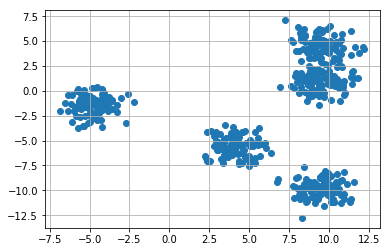

In [71]:
X,Y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=4)
plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()


In [72]:
K = 5

color = ["green","orange","blue","red","yellow"]

clusters = {}

for i in range(K):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    
    cluster = {
        'center':center,
        'points':points,
        'color':color[i]
    }
    
    clusters[i] = cluster
    
#print(center)
#print(clusters)

In [73]:
def distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

(100, 2)
(0,)
(200, 2)
(200, 2)
(0,)


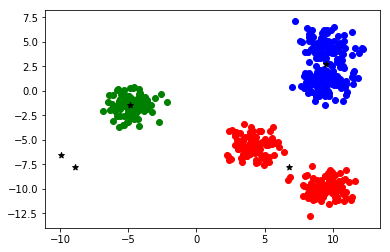

In [78]:
#Assign every point to a cluster
def AssignPointToCluster(clusters):   #E-Step
    for ix in range(X.shape[0]):
        dist = []
        current_x = X[ix]

        for kx in range(K):
            d = distance(current_x,clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(current_x)

def UpdateClusters(clusters):    #M-Step
    for i in range(K):
        pts = np.array(clusters[i]['points'])
        
        if pts.shape[0]>0:
            new_u = pts.mean(axis=0)
            clusters[i]['center'] = new_u
            clusters[i]['points'] = []    #clears the list
            

def PlotClusters(clusters):
    for i in range(K):
        #print(len(clusters[i]['points']))
        pts = np.array(clusters[i]['points'])
        print(pts.shape)
        try:
            plt.scatter(pts[:,0],pts[:,1],c=clusters[i]['color'])
        except:
            pass
        
        uk = clusters[i]['center']
        plt.scatter(uk[0],uk[1],color="black",marker="*")
        
        
AssignPointToCluster(clusters)
PlotClusters(clusters)
UpdateClusters(clusters)